# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

This cell contains library that needed for this project,it contain such as pandas,matplotlib,seaborn,Sklear,and we using classification algorithm

In [2]:
df = pd.read_csv('dataset/bank.csv',delimiter=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


This cell contains the code for importing dataset from the datasets folder and the dataset uses csv file

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


This cell contains the code for showing the info of the datasets

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

This cell contain the code for showing the missing value in dataset

# Prepocessing

In [7]:
categorical_col = []

for col in df.select_dtypes(include='object'):
    categorical_col.append(col)

categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

This cell contain the code for showing the categorical column in dataset

In [8]:
num_col = []

for col in df.select_dtypes(include='int64'):
    num_col.append(col)

num_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

This cell contain the code for showing the numerical column in dataset

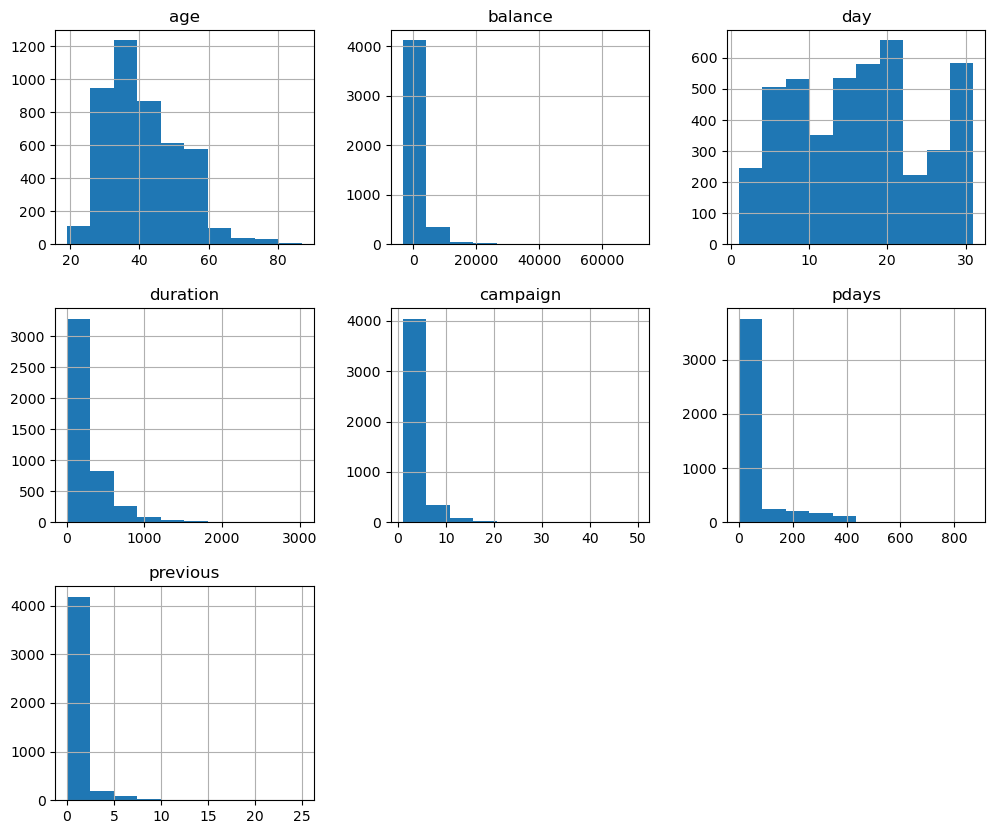

In [9]:
num_col = df.select_dtypes(include='int64').columns

df[num_col].hist(
    figsize=(12, 10)
)
plt.show()

This cell contain the code for showing the visualization for numerical column in dataset

In [10]:
cat_col = ['marital', 'education', 'housing', 'loan', 'default']
encoded_data = pd.get_dummies(df[cat_col], prefix=cat_col)
new_data_encoded = pd.concat([df, encoded_data], axis=1)
new_data_encoded = new_data_encoded.drop(cat_col, axis=1)

In [11]:
new_data_encoded

,age,job,balance,contact,day,month,duration,campaign,pdays,previous,...,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes,default_no,default_yes
0,30,unemployed,1787,cellular,19,oct,79,1,-1,0,...,True,False,False,False,True,False,True,False,True,False
1,33,services,4789,cellular,11,may,220,1,339,4,...,False,True,False,False,False,True,False,True,True,False
2,35,management,1350,cellular,16,apr,185,1,330,1,...,False,False,True,False,False,True,True,False,True,False
3,30,management,1476,unknown,3,jun,199,4,-1,0,...,False,False,True,False,False,True,False,True,True,False
4,59,blue-collar,0,unknown,5,may,226,1,-1,0,...,False,True,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,-333,cellular,30,jul,329,5,-1,0,...,False,True,False,False,False,True,True,False,True,False
4517,57,self-employed,-3313,unknown,9,may,153,1,-1,0,...,False,False,True,False,False,True,False,True,False,True
4518,57,technician,295,cellular,19,aug,151,11,-1,0,...,False,True,False,False,True,False,True,False,True,False
4519,28,blue-collar,1137,cellular,6,feb,129,4,211,3,...,False,True,False,False,True,False,True,False,True,False


This cell contain the code for changing the order of the column using one hot encoder

In [12]:
encode = LabelEncoder()
new_data_encoded['job'] = encode.fit_transform(new_data_encoded['job'])
new_data_encoded['contact'] = encode.fit_transform(new_data_encoded['contact'])
new_data_encoded['month'] = encode.fit_transform(new_data_encoded['month'])
new_data_encoded['poutcome'] = encode.fit_transform(new_data_encoded['poutcome'])

This cell contain the code for changing the order of the column using Label Encoder

In [13]:
X = new_data_encoded.drop(columns='y', axis=1).values
y = new_data_encoded['y'].values

This cell contain the code for splitting the dataset for our model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

This cell contain the code for defining split dataset as X_train, X_test, y_train, y_test

# Algorithm Model

## Logistic Regression

In [15]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [16]:
y_pred = logreg.predict(X_test)

In [17]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8777


## Decision Tree

In [18]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
y_preddt = dt.predict(X_test)

In [20]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_preddt)))

Model accuracy score: 0.8592


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
y_predrf = rf.predict(X_test)

In [23]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predrf)))
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_predrf)
print(matrix)

Model accuracy score: 0.8931
[[1171   19]
 [ 126   41]]


## Support Vector Machine

In [24]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(X_train,y_train)

SVC()

In [25]:
y_predsvc = svm_model.predict(X_test)

In [26]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predsvc)))

Model accuracy score: 0.8769


## Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB 
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [28]:
y_prednb = nb.predict(X_test)

In [29]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_prednb)))

Model accuracy score: 0.8010


## KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
kNN=KNeighborsClassifier()
kNN.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
y_predknn = kNN.predict(X_test)

In [32]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predknn)))

Model accuracy score: 0.8710


In [33]:
print("Logistic Regression:", accuracy_score(y_test,y_pred))
print("Decision Tree:", accuracy_score(y_test,y_preddt))
print("Random Forest:", accuracy_score(y_test,y_predrf))
print("SVM:", accuracy_score(y_test,y_predsvc))
print("Naive Bayes:", accuracy_score(y_test,y_prednb))
print("KNN:", accuracy_score(y_test,y_predknn))

Logistic Regression: 0.8776713338246132
Decision Tree: 0.8592483419307295
Random Forest: 0.8931466470154753
SVM: 0.8769344141488578
Naive Bayes: 0.8010316875460575
KNN: 0.871039056742815


### For this dataset i prefer use Random Forest Classifer as my model because it has the highest score among the algorithm that i tried